In [2]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Arrow , Circle , ConnectionPatch , Rectangle
import matplotlib.pyplot as plt

In [14]:
f1 = open(r"data_full1.csv")
df = pd.read_csv(f1)
df

,Unnamed: 0,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,66.0,89.0,78.0,100.0
2,2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,78.0,100.0,34.0,97.0
4,4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1517,1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1518,1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,28.0,38.0,29.0,36.0
1519,1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,21.0,38.0,83.0,0.0


In [15]:
#按比例缩放

df.loc[ : , ['EventOrigin_x','EventDestination_x']] = df.loc[ : , ['EventOrigin_x','EventDestination_x']].apply(lambda x:  x * 1.2)
df.loc[ : , ['EventOrigin_y','EventDestination_y']] = df.loc[ : , ['EventOrigin_y','EventDestination_y']].apply(lambda x:  x * 0.8)
df

,Unnamed: 0,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,79.2,71.2
1,1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,79.2,71.2,93.6,80.0
2,2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,79.2,71.2,93.6,80.0
3,3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,93.6,80.0,40.8,77.6
4,4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,40.8,77.6,70.8,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,34.8,28.8,33.6,30.4
1517,1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,34.8,28.8,33.6,30.4
1518,1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,33.6,30.4,34.8,28.8
1519,1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,25.2,30.4,99.6,0.0


In [16]:
f1 = open(r"pro_D_dataset//final_df1.csv")
df = pd.read_csv(f1)
df

,Unnamed: 0,Unnamed: 0.1,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,0,0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,79.2,71.2
1,1,1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,79.2,71.2,93.6,80.0
2,2,2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,79.2,71.2,93.6,80.0
3,3,3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,93.6,80.0,40.8,77.6
4,4,4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,40.8,77.6,70.8,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1516,1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,34.8,28.8,33.6,30.4
1517,1517,1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,34.8,28.8,33.6,30.4
1518,1518,1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,33.6,30.4,34.8,28.8
1519,1519,1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,25.2,30.4,99.6,0.0


In [17]:
df1t = df.loc[df.MatchPeriod == '1H']
df2t = df.loc[df.MatchPeriod == '2H']
df1t

,Unnamed: 0,Unnamed: 0.1,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,0,0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,79.2,71.2
1,1,1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,79.2,71.2,93.6,80.0
2,2,2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,79.2,71.2,93.6,80.0
3,3,3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,93.6,80.0,40.8,77.6
4,4,4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,40.8,77.6,70.8,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,730,730,1,Opponent1,Opponent1_D2,Opponent1_M1,1H,2792.948355,Pass,Simple pass,74.4,56.0,68.4,51.2
731,731,731,1,Opponent1,Opponent1_M1,Opponent1_D3,1H,2794.581120,Pass,Simple pass,68.4,51.2,70.8,13.6
732,732,732,1,Opponent1,Opponent1_D3,Opponent1_D3,1H,2799.115514,Pass,Simple pass,70.8,13.6,68.4,19.2
733,733,733,1,Opponent1,Opponent1_D3,Opponent1_D1,1H,2805.262144,Pass,High pass,68.4,19.2,13.2,66.4


In [18]:
df1 = df1t[ ['TeamID', 'EventTime', 'EventType', 'EventSubType', 'OriginPlayerID', 'DestinationPlayerID', 'EventOrigin_x', 'EventOrigin_y', 'EventDestination_x', 'EventDestination_y'] ]
df1

,TeamID,EventTime,EventType,EventSubType,OriginPlayerID,DestinationPlayerID,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,Huskies,31.174681,Free Kick,Goal kick,Huskies_G1,NaN,0.0,0.0,79.2,71.2
1,Opponent1,33.730326,Duel,Air duel,Opponent1_D1,NaN,79.2,71.2,93.6,80.0
2,Huskies,33.812965,Duel,Air duel,Huskies_F1,NaN,79.2,71.2,93.6,80.0
3,Opponent1,42.611028,Free Kick,Throw in,Opponent1_D2,NaN,93.6,80.0,40.8,77.6
4,Huskies,46.323501,Pass,Head pass,Huskies_D1,Huskies_F1,40.8,77.6,70.8,76.0
...,...,...,...,...,...,...,...,...,...,...
730,Opponent1,2792.948355,Pass,Simple pass,Opponent1_D2,Opponent1_M1,74.4,56.0,68.4,51.2
731,Opponent1,2794.581120,Pass,Simple pass,Opponent1_M1,Opponent1_D3,68.4,51.2,70.8,13.6
732,Opponent1,2799.115514,Pass,Simple pass,Opponent1_D3,Opponent1_D3,70.8,13.6,68.4,19.2
733,Opponent1,2805.262144,Pass,High pass,Opponent1_D3,Opponent1_D1,68.4,19.2,13.2,66.4


In [70]:
#选取Huskies队的数据
df1H = df1.loc[df1.TeamID == 'Huskies']
df1H

,TeamID,EventTime,EventType,EventSubType,OriginPlayerID,DestinationPlayerID,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,Huskies,31.174681,Free Kick,Goal kick,Huskies_G1,NaN,0.0,0.0,79.2,71.2
2,Huskies,33.812965,Duel,Air duel,Huskies_F1,NaN,79.2,71.2,93.6,80.0
4,Huskies,46.323501,Pass,Head pass,Huskies_D1,Huskies_F1,40.8,77.6,70.8,76.0
5,Huskies,47.004714,Duel,Ground loose ball duel,Huskies_F1,NaN,70.8,76.0,76.8,75.2
8,Huskies,49.880983,Pass,Head pass,Huskies_F1,NaN,66.0,76.0,68.4,74.4
...,...,...,...,...,...,...,...,...,...,...
721,Huskies,2706.987378,Pass,Simple pass,Huskies_M1,NaN,79.2,60.8,97.2,60.8
723,Huskies,2710.221447,Pass,Simple pass,Huskies_F3,Huskies_F1,94.8,64.0,106.8,76.8
724,Huskies,2712.240837,Pass,Cross,Huskies_F1,Huskies_F2,106.8,76.8,112.8,39.2
725,Huskies,2714.265932,Shot,Shot,Huskies_F2,NaN,112.8,39.2,0.0,0.0


## EventType分为以下4类：  
### 1、	普通传递：  
pass  
others on the ball  
<font color=red>shot</font> 
### 2、	争抢（和pass差不多，但可能会出现多个，可忽略重复的）：  
<font color = blue>duel</font>  
### 3、	中止（出现了一定会比赛停止，重新开球）：  
Foul  
offside  
interuption  
### 4、	开球：  
free kick  
### 5、	特殊：  
save attempt（一般可忽略，但出现则前面一定发生了攻门，未必是shot可能是cross等）  
goalkeeperLeavingLine（可忽略）  
substitution（可忽略）  

In [76]:
def getChains(df):
    i = 0
    labels = []
    nodes = []
    # chains 是 time : coordinates对，每一次进攻链用开始时间标记
    chains = {}
    coordinates = []
    pre = []
    time = 0
    for idx, row in df.iterrows():
        o_coord = [row.EventOrigin_x, row.EventOrigin_y]
        if(row.EventDestination_x == 0 and row.EventDestination_y == 0):
            d_coord = [120, 40]
        else:
            d_coord = [row.EventDestination_x, row.EventDestination_y]
        # time = 0，说明列表均为空
        if time == 0:
            time = row.EventTime
            coordinates.append(o_coord)
            nodes.append(i)
            i += 1
        #上一行的dest是否等于这一行的origin
        if  coordinates[-1] == o_coord:
            coordinates.append(d_coord)
            #节点
            nodes.append(i)
            i += 1
             #详情
            detail = {'EventType' : row.EventType, 
                      'EventSubType' : row.EventSubType, 
                      'OriginPlayerID' : row.OriginPlayerID, 
                      'DestinationPlayerID' : row.DestinationPlayerID}
            labels.append(detail)

        else:
            chains[time] = {'nodes': nodes, 
                            'labels' : labels, 
                            'coordinates' : coordinates}
            coordinates = [o_coord, d_coord]
            detail = {'EventType' : row.EventType, 
                      'EventSubType' : row.EventSubType, 
                      'OriginPlayerID' : row.OriginPlayerID, 
                      'DestinationPlayerID' : row.DestinationPlayerID}
            labels = [detail]
            nodes = [i, i + 1]
            i += 2
            time = row.EventTime

    return chains
        

# 查看chains结构  
结构为  
{ time : {  
    nodes : [0, 1, 2]  
    labels : [ {eventType, subType, originPlayerID, DestinationPlayerID}, {     } ]  
    coordinates: [  [], [], [], ]  
    }  
}
    


In [77]:
chains = getChains(df1H)
chains

{31.174681: {'nodes': [0, 1, 2],
  'labels': [{'EventType': 'Free Kick',
    'EventSubType': 'Goal kick',
    'OriginPlayerID': 'Huskies_G1',
    'DestinationPlayerID': nan},
   {'EventType': 'Duel',
    'EventSubType': 'Air duel',
    'OriginPlayerID': 'Huskies_F1',
    'DestinationPlayerID': nan}],
  'coordinates': [[0.0, 0.0], [79.2, 71.2], [93.6, 80.0]]},
 46.323501: {'nodes': [3, 4, 5],
  'labels': [{'EventType': 'Pass',
    'EventSubType': 'Head pass',
    'OriginPlayerID': 'Huskies_D1',
    'DestinationPlayerID': 'Huskies_F1'},
   {'EventType': 'Duel',
    'EventSubType': 'Ground loose ball duel',
    'OriginPlayerID': 'Huskies_F1',
    'DestinationPlayerID': nan}],
  'coordinates': [[40.8, 77.60000000000002], [70.8, 76.0], [76.8, 75.2]]},
 49.880983: {'nodes': [6, 7],
  'labels': [{'EventType': 'Pass',
    'EventSubType': 'Head pass',
    'OriginPlayerID': 'Huskies_F1',
    'DestinationPlayerID': nan}],
  'coordinates': [[66.0, 76.0], [68.39999999999999, 74.4]]},
 51.0225460000

In [33]:
# 绘图函数
def CreatePitch(ax):
    # boarder line
    # 原始：OuterLine = Rectangle([0,0],width = 120, height = 80, fill = True, color = 'green')
    OuterLine = Rectangle([0,0],width = 120, height = 80, fill = True, color = 'green')

    LeftPenalty = Rectangle([0,19.85],width =16.5 , height = 40.3, fill = False)
    RightPenalty = Rectangle([103.5,19.85],width =16.5 , height =40.3  ,fill = False)
    MidLine = ConnectionPatch([60,0],[60,80],"data","data")
   
    # Mid Circle
    MidCircle = Circle([60,40],9.15,fill = False)
   
    # 6 Yards area
    LeftSix = Rectangle([0,30.85],width = 5.5,height = 18.3,fill = False)
    RightSix = Rectangle([114.5,30.85],width = 5.5,height = 18.3,fill = False)
   
    # Dot near penalty area
    LDot = Circle([11,40],0.8,fill = True,color = 'white')
    RDot = Circle([109,40],0.8,fill = True,color = 'white')
   
    # Goal post
    Lgoal = Rectangle([0,36.35],width = 2.3 , height = 7.3 ,
                      angle = 360 , fill = True, color = 'white')
    Rgoal = Rectangle([117.5,36.35],width = 2.3 , height = 7.3 ,
                      angle = 360 ,fill = True, color = 'white')
    
    # Arcs
    leftArc = Arc((11,40),height=18,width=20,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((109,40),height=16,width=20,angle=0,theta1=130,theta2=230,color="black")
   
    # mid point
    MidPoint = Circle([60,40], 0.8,fill = True,color = 'white')
    objects = [OuterLine,LeftPenalty,RightPenalty,MidLine,MidCircle,LeftSix,
               RightSix, MidPoint,LDot,RDot,Lgoal,Rgoal,leftArc,rightArc]

    for i in objects:
        ax.add_patch(i)

In [34]:
def createItems(chains):
    nodes = []
    coordinates = []
    edges = []
    for time in chains:
        item = chains[time]
        item_nodes = item['nodes']
        nodes.extend( item_nodes )
        for i in range(len(item_nodes) - 1):
            edges.append( [ item_nodes[i], item_nodes[i + 1] ] ) 
        coordinates.extend(item['coordinates'])
    return nodes, coordinates, edges

In [78]:
nodes, coordinates, edges = createItems(chains)

In [87]:
nodes1 = nodes[0: int(len(nodes) / 2)]
nodes2 = nodes[len(nodes1): ]
coordinates1 = coordinates[0: int(len(coordinates) / 2)]
coordinates2 = coordinates[len(coordinates1) : ]

print(len(nodes))
print(len(nodes1))
print(len(nodes2))
print(len(coordinates1))

542
271
271
271


In [90]:
vnode1= np.array(coordinates1)
vnode2= np.array(coordinates2)

npos1 = dict(zip(nodes1, vnode1))
npos2 = dict(zip(nodes2, vnode2))

In [92]:
npos2

{271: array([66. , 40.8]),
 272: array([61.2, 54.4]),
 273: array([74.4, 79.2]),
 274: array([69.6, 74.4]),
 275: array([54., 48.]),
 276: array([63.6, 23.2]),
 277: array([78. , 17.6]),
 278: array([70.8, 29.6]),
 279: array([72. , 26.4]),
 280: array([68.4, 18.4]),
 281: array([81.6,  5.6]),
 282: array([61.2, 16. ]),
 283: array([56.4, 44.8]),
 284: array([72. , 69.6]),
 285: array([81.6, 77.6]),
 286: array([106.8,  76.8]),
 287: array([117.6,   2.4]),
 288: array([114. ,   5.6]),
 289: array([115.2,   0. ]),
 290: array([112.8,  19.2]),
 291: array([116.4,  17.6]),
 292: array([120.,  40.]),
 293: array([120.,   0.]),
 294: array([99.6, 47.2]),
 295: array([120.,  40.]),
 296: array([52.8, 21.6]),
 297: array([68.4, 16. ]),
 298: array([56.4, 23.2]),
 299: array([78. , 41.6]),
 300: array([60. , 10.4]),
 301: array([60. ,  5.6]),
 302: array([46.8, 12. ]),
 303: array([85.2,  6.4]),
 304: array([50.4,  0. ]),
 305: array([68.4,  8. ]),
 306: array([63.6,  4. ]),
 307: array([92.4,

NetworkXError: Node 271 has no position.

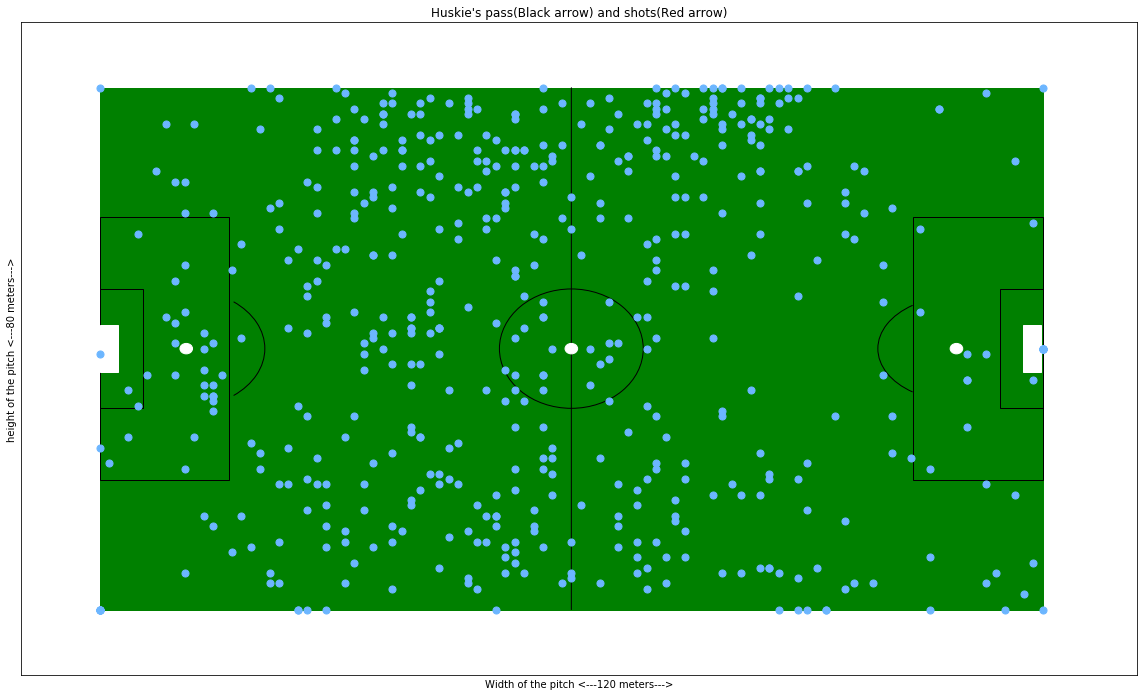

In [93]:
vnode1= np.array(coordinates1)
vnode2= np.array(coordinates2)
vnode= np.array(coordinates)

npos1 = dict(zip(nodes1, vnode1))
npos2 = dict(zip(nodes2, vnode2))
npos = dict(zip(nodes, vnode))

G=nx.MultiDiGraph()
G.add_nodes_from(nodes)  # 从列表中加点
G.add_edges_from(edges)


fig=plt.figure(figsize = (20,12)) 
ax=fig.add_subplot(1,1,1)
CreatePitch(ax) #overlay our different objects on the pitch
plt.ylim(-10, 90)
plt.xlim(-10, 132)
plt.xlabel("Width of the pitch <---120 meters--->", color = 'black')
plt.ylabel("height of the pitch <---80 meters--->", color = 'black')
plt.title("Huskie's pass(Black arrow) and shots(Red arrow)")

nx.draw_networkx_nodes(G, npos, node_size=50, node_color="#6CB6FF")  # 绘制节点
nx.draw_networkx_nodes(G, npos1, node_size=50, node_color="#6CB6FF")  # 绘制节点
# nx.draw_networkx_edges(G, npos1, edges, width=0.8)  # 绘制边
# nx.draw_networkx_labels(G, npos, nlabels)  # 标签

nx.draw_networkx_nodes(G, npos2, node_size=50, node_color="red")  # 绘制节点
nx.draw_networkx_edges(G, npos2, edges, width=0.8)  # 绘制边
plt.show()

# 下面是草稿，不需要运行

Graph has 7 nodes with 7 edges


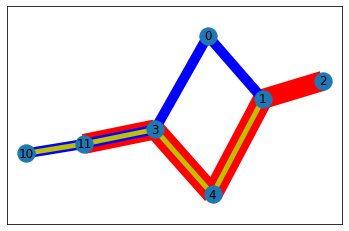

In [94]:
import random
G=nx.Graph(name="buba")
routes = [[2, 1, 4, 3, 11], [1, 0, 3, 11, 10], [10, 11, 3, 4, 1]]
edges = []
for r in routes:
    route_edges = [(r[n],r[n+1]) for n in range(len(r)-1)]
    G.add_nodes_from(r)
    G.add_edges_from(route_edges)
    edges.append(route_edges)
print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),    
G.number_of_edges()))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=pos)
nx.draw_networkx_labels(G,pos=pos)
colors = ['r', 'b', 'y']
linewidths = [20,10,5]
for ctr, edgelist in enumerate(edges):
    nx.draw_networkx_edges(G,pos=pos,edgelist=edgelist,edge_color = colors[ctr], width=linewidths[ctr])
plt.show()